In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_csv("./veri_setleri/kalp_rahatsizligi.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yas                     303 non-null    float64
 1   cinsiyet                303 non-null    object 
 2   gogus_agrisi_tipi       303 non-null    object 
 3   hareketsiz_kan_basinci  303 non-null    float64
 4   serum_kolestrol         303 non-null    float64
 5   aclik_kan_sekeri        303 non-null    int64  
 6   elektrokardiyografi     303 non-null    object 
 7   en_yuksek_kalp_hizi     303 non-null    float64
 8   anjin_bagli_egsersiz    303 non-null    int64  
 9   st_depresyonu           303 non-null    float64
 10  st_egimi                303 non-null    object 
 11  buyuk_damarlar          299 non-null    float64
 12  talasemi                301 non-null    object 
 13  kalp_rahatsizligi       303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory 

In [3]:
data.head(3)


,yas,cinsiyet,gogus_agrisi_tipi,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,elektrokardiyografi,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,st_egimi,buyuk_damarlar,talasemi,kalp_rahatsizligi
0,63.0,erkek,tipik anjinal,145.0,233.0,1,sol ventikuler hipertrofi,150.0,0,2.3,asagi egimli,0.0,sabit defekt,0
1,67.0,erkek,asemptomatik,160.0,286.0,0,sol ventikuler hipertrofi,108.0,1,1.5,duz,3.0,normal,1
2,67.0,erkek,asemptomatik,120.0,229.0,0,sol ventikuler hipertrofi,129.0,1,2.6,duz,2.0,tersinir defekt,1


In [4]:
data.rename(
    columns={
        "gogus_agrisi_tipi": "gat",
        "hareketsiz_kan_basinci": "hkb",
        "serum_kolestrol": "kolestrol",
        "aclik_kan_sekeri": "aks",
        "elektrokardiyografi": "ekg",
        "en_yuksek_kalp_hizi": "eykh",
        "anjin_bagli_egsersiz": "abe",
        "st_depresyonu": "st_d",
        "st_egimi": "st_e",
        "buyuk_damarlar": "bds",
    },
    inplace=True,
)


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                303 non-null    float64
 1   cinsiyet           303 non-null    object 
 2   gat                303 non-null    object 
 3   hkb                303 non-null    float64
 4   kolestrol          303 non-null    float64
 5   aks                303 non-null    int64  
 6   ekg                303 non-null    object 
 7   eykh               303 non-null    float64
 8   abe                303 non-null    int64  
 9   st_d               303 non-null    float64
 10  st_e               303 non-null    object 
 11  bds                299 non-null    float64
 12  talasemi           301 non-null    object 
 13  kalp_rahatsizligi  303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 33.3+ KB


In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
bds = data.iloc[:, [11]].values
tal = data.iloc[:, [12]].values
data["bds"] = imp.fit_transform(bds)
data["talasemi"] = imp.fit_transform(tal)
del bds, tal


In [7]:
le = LabelEncoder()
data["cinsiyet"] = le.fit_transform(data["cinsiyet"])
data["gat"] = le.fit_transform(data["gat"])
data["ekg"] = le.fit_transform(data["ekg"])
data["st_e"] = le.fit_transform(data["st_e"])
data["talasemi"] = le.fit_transform(data["talasemi"])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                303 non-null    float64
 1   cinsiyet           303 non-null    int64  
 2   gat                303 non-null    int64  
 3   hkb                303 non-null    float64
 4   kolestrol          303 non-null    float64
 5   aks                303 non-null    int64  
 6   ekg                303 non-null    int64  
 7   eykh               303 non-null    float64
 8   abe                303 non-null    int64  
 9   st_d               303 non-null    float64
 10  st_e               303 non-null    int64  
 11  bds                303 non-null    float64
 12  talasemi           303 non-null    int64  
 13  kalp_rahatsizligi  303 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 33.3 KB


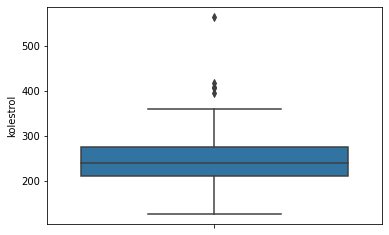

In [8]:
sns.boxplot(data=data, y="kolestrol")
plt.show()


In [9]:
data.kolestrol.describe()


count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: kolestrol, dtype: float64

In [10]:
q1 = data.kolestrol.describe()[4]
q3 = data.kolestrol.describe()[6]
iqr = q3 - q1
min_k = q1 - 1.5 * iqr
max_k = q3 + 1.5 * iqr
min_k, max_k


(115.0, 371.0)

In [11]:
# Veri Filtreleme
data = data[(data["kolestrol"] >= min_k) & (data["kolestrol"] <= max_k)]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                298 non-null    float64
 1   cinsiyet           298 non-null    int64  
 2   gat                298 non-null    int64  
 3   hkb                298 non-null    float64
 4   kolestrol          298 non-null    float64
 5   aks                298 non-null    int64  
 6   ekg                298 non-null    int64  
 7   eykh               298 non-null    float64
 8   abe                298 non-null    int64  
 9   st_d               298 non-null    float64
 10  st_e               298 non-null    int64  
 11  bds                298 non-null    float64
 12  talasemi           298 non-null    int64  
 13  kalp_rahatsizligi  298 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 34.9 KB


In [12]:
X = data.iloc[:, 0:13].values
X = minmax_scale(X, feature_range=(0, 1))
y = data.iloc[:, [13]].values.ravel()


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22
)


In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [15]:
y_predict = knn.predict(x_test)
y_test, y_predict


(array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]))

<function matplotlib.pyplot.show(close=None, block=None)>

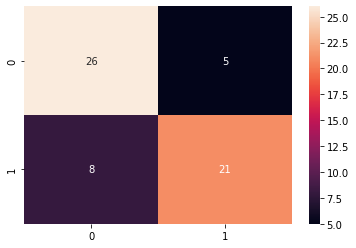

In [16]:
cfm = confusion_matrix(y_test, y_predict, labels=[0, 1])
sns.heatmap(data=cfm, annot=True)
plt.show


In [17]:
print(classification_report(y_test, y_predict))
print(knn.score(x_test, y_test))


              precision    recall  f1-score   support

           0       0.76      0.84      0.80        31
           1       0.81      0.72      0.76        29

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

0.7833333333333333


In [18]:
for i in range(3, 180):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    score = knn2.score(x_test, y_test)
    print(f"{i} komşu için doğruluk: {score}")


3 komşu için doğruluk: 0.8
4 komşu için doğruluk: 0.8166666666666667
5 komşu için doğruluk: 0.7833333333333333
6 komşu için doğruluk: 0.8166666666666667
7 komşu için doğruluk: 0.8
8 komşu için doğruluk: 0.8
9 komşu için doğruluk: 0.8
10 komşu için doğruluk: 0.8
11 komşu için doğruluk: 0.8166666666666667
12 komşu için doğruluk: 0.8333333333333334
13 komşu için doğruluk: 0.8333333333333334
14 komşu için doğruluk: 0.8333333333333334
15 komşu için doğruluk: 0.8333333333333334
16 komşu için doğruluk: 0.8333333333333334
17 komşu için doğruluk: 0.8333333333333334
18 komşu için doğruluk: 0.85
19 komşu için doğruluk: 0.8333333333333334
20 komşu için doğruluk: 0.85
21 komşu için doğruluk: 0.8166666666666667
22 komşu için doğruluk: 0.8166666666666667
23 komşu için doğruluk: 0.8166666666666667
24 komşu için doğruluk: 0.8166666666666667
25 komşu için doğruluk: 0.8166666666666667
26 komşu için doğruluk: 0.8333333333333334
27 komşu için doğruluk: 0.8166666666666667
28 komşu için doğruluk: 0.833333333

In [21]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
score_gNB = gnb.score(x_test, y_test)

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
score_bNB = bnb.score(x_test, y_test)

score_gNB, score_bNB


(0.85, 0.8333333333333334)

In [22]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
score_svm = svm.score(x_test, y_test)
score_svm


0.8166666666666667

In [28]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv=10)
lr.fit(x_train, y_train)
score_lr = lr.score(x_test, y_test)
score_lr


0.8166666666666667